<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: Alireza Shokrani

**Student ID**: 99106255

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [5]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [6]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, train_size=0.7)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, train_size=0.67)
### END CODE HERE ###

## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: As we slice the data randomly in each run, the result isn’t constant and can be different each time, but the exact value of C is not important because any value it has, we capture it by using ‘max’ function and working with it.

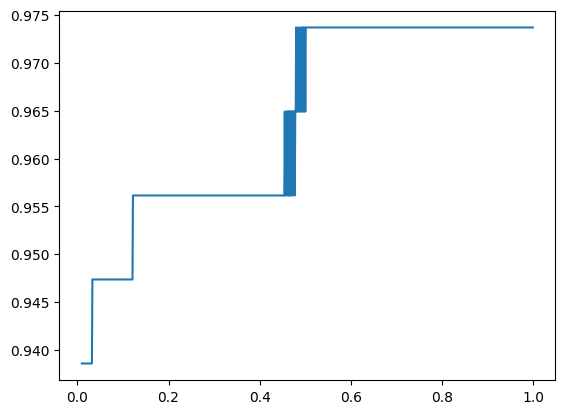

In [7]:
### START CODE HERE ###
reg_par = np.arange(0.01,1,0.001)
scores = []
for c in reg_par:
    clf = LogisticRegression(C = c, solver='liblinear').fit(X_train, Y_train)
    scores.append(clf.score(X_val, Y_val))

plt.plot(reg_par, scores)
plt.show()
### END CODE HERE ###

Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: Because we generated the train, validation and test set randomly, the performance is not constant but it seems like we get a performance of greater than 90% in average.

In [8]:
### START CODE HERE ###
idx = np.argmax(scores)
c_max = reg_par[idx]
clf = LogisticRegression(C = c_max, solver='liblinear').fit(X_train, Y_train)
sc_val = clf.score(X_val, Y_val)
sc_test = clf.score(X_test, Y_test)
print(f'score of validation set = {sc_val}')
print(f'score of test set = {sc_test}')
### END CODE HERE ###

score of validation set = 0.9736842105263158
score of test set = 0.9649122807017544


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

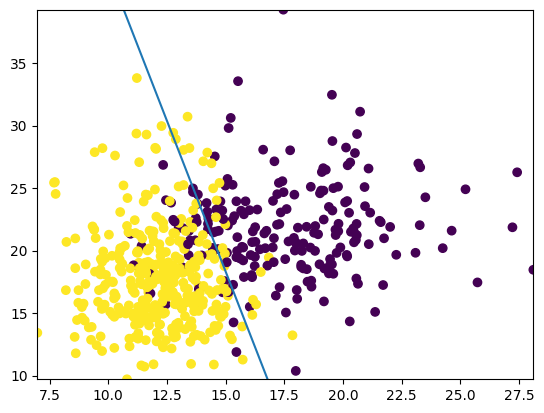

In [9]:
### START CODE HERE ###
X_new = X[:,:2]
clf = LogisticRegression().fit(X_new, Y)
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
b1 = -w1/w2
b0 = -b/w2
xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
ymin, ymax = np.min(X[:,1]), np.max(X[:,1])
xd = np.array([xmin, xmax])
yd = b1 * xd + b0
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.plot(xd, yd)
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: The score for this method is above 96% which is a good result.

In [10]:
### START CODE HERE ###
clf = GaussianNB().fit(X_train, Y_train)
sc_val = clf.score(X_val, Y_val)
sc_test = clf.score(X_test, Y_test)
print(f'score of validation set = {sc_val}')
print(f'score of test set = {sc_test}')
### END CODE HERE ###

score of validation set = 0.9649122807017544
score of test set = 0.9649122807017544


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: We get the best result so far from this method by a score above 98%.

In [12]:
### START CODE HERE ###
clf = LinearDiscriminantAnalysis().fit(X_train, Y_train)
sc_val = clf.score(X_val, Y_val)
sc_test = clf.score(X_test, Y_test)
print(f'score of validation set = {sc_val}')
print(f'score of test set = {sc_test}')
### END CODE HERE ###

score of validation set = 0.9736842105263158
score of test set = 0.9824561403508771


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: The best method was Linear Discriminant Analysis with a score above 98% for the test set.